## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [148]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

### Load the dataset

In [149]:
# Load the data set :: for brevity have renamed with a prefix as 06W_...
df = pd.read_csv('06W_tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [150]:
# Initialize lists to store column names
categorical_columns = []
numerical_columns = []

# Loop through each column and check its data type
for column in df.columns:
    if df[column].dtype in ['object', 'category']:
        categorical_columns.append(column)
    elif pd.api.types.is_numeric_dtype(df[column]):
        numerical_columns.append(column)

print('Categorial Variables',categorical_columns)
print('Numerical Variables',numerical_columns)

Categorial Variables ['sex', 'smoker', 'day', 'time']
Numerical Variables ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [151]:
# Compute the average bill amount for each day
average_bill_per_day = df.groupby('day')['total_bill'].mean()

# Rename columns for clarity
average_bill_per_day.columns = ['Day', 'Average Total Bill']

# Display the result
print(average_bill_per_day)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [152]:
# Calculate the average tip given by each gender
average_tip_by_gender = df.groupby('sex')['tip'].mean()

# Display the result
print(average_tip_by_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [153]:
# Count the number of customers for dinner and lunch
customers_by_time = df.groupby('time')['size'].count()

# Display the result
print(customers_by_time)

time
Dinner    176
Lunch      68
Name: size, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [154]:
# Get a statistical summary of the 'tip' variable
tip_summary = df['tip'].describe()

# Display the result
print(tip_summary)

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


Additional comments
Skewness: The difference between the mean ($3.00) and the median ($2.90) is small, suggesting that the distribution of tip amounts is relatively symmetric, though slightly positively skewed. The presence of a few large tips (up to $10) might be contributing to this.

Outliers: The maximum tip of $10.00 is quite a bit higher than the 75th percentile, suggesting the presence of some outliers or high tips that are not typical compared to the rest of the data.

Overall Range: Tips range from $1.00 to $10.00, showing a wide variability in tipping behavior among customers.

### 6. Find the busiest day in terms of the orders?

In [155]:
# Lab Class Method
# Determine the busiest day
df.day.mode()

0    Sat
Name: day, dtype: object

In [156]:
# Detailed Method
# Count the number of orders for each day
orders_by_day = df['day'].value_counts()

# Display the result
print(orders_by_day)

# Determine the busiest day
busiest_day = orders_by_day.idxmax()
busiest_day_count = orders_by_day.max()

print(f"The busiest day is {busiest_day} with {busiest_day_count} orders.")

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
The busiest day is Sat with 87 orders.


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

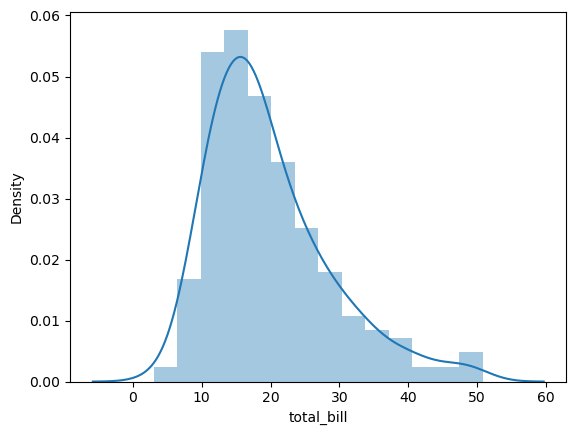

In [157]:
# Lab Class method
sns.distplot(df['total_bill'])
plt.show()

In [158]:
# Lab Class method
df['total_bill'].skew()

1.1332130376158205

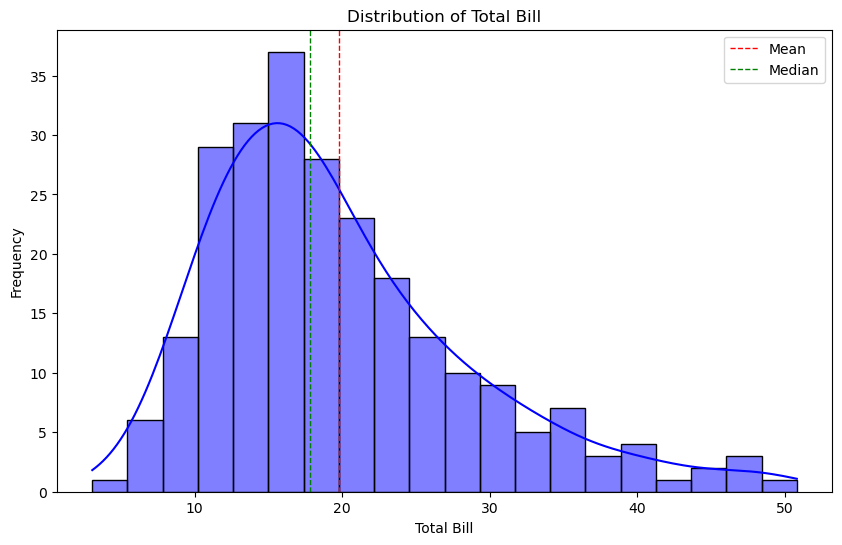

Skewness of 'total_bill': 1.1332130376158205


In [159]:
# Calculate skewness of the 'total_bill' variable
total_bill_skewness = df['total_bill'].skew()

# Plot the distribution of the 'total_bill' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True, bins=20, color='blue')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.axvline(df['total_bill'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['total_bill'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

print(f"Skewness of 'total_bill': {total_bill_skewness}")

The skewness of the total_bill variable is approximately 1.13, indicating that the data is positively skewed.
Interpretation:
Positive Skewness: This means that the distribution has a longer tail on the right side. In other words, there are a few larger total bill
amounts that pull the average up, creating a rightward skew.
Plot Details:
Histogram: The histogram of the total_bill variable shows that most of the data points are clustered towards the lower end, with a few larger
values extending the tail to the right.
Mean vs. Median: The mean (red dashed line) is greater than the median (green dashed line), which is a typical characteristic
of positively skewed data.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [160]:
# Lab Class Method
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


Correlation between total bill and tip: 0.68


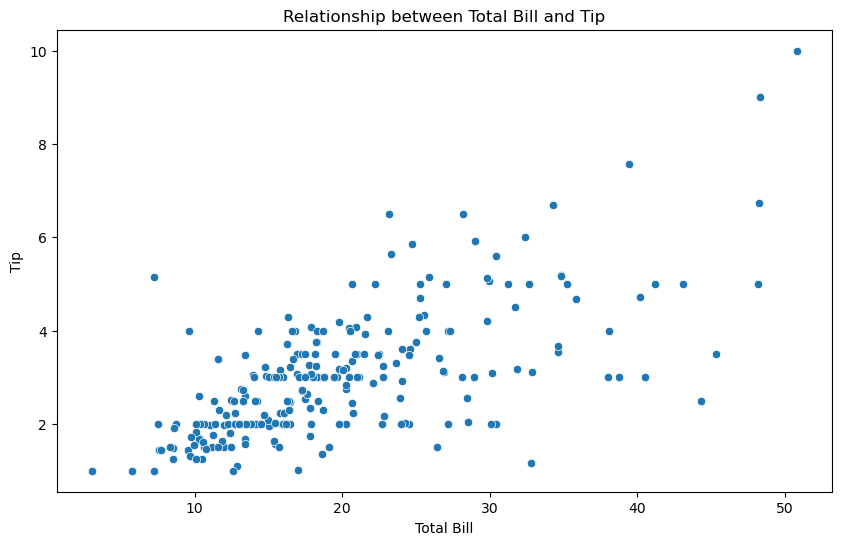

In [161]:
# Calculate the correlation between total bill and tip
correlation = df['total_bill'].corr(df['tip'])
print(f"Correlation between total bill and tip: {correlation:.2f}")

# Visualize the relationship using a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Dependency: The positive trend indicates that the tip amount is somewhat dependent on the total bill amount, as expected.
Influence of Other Factors: The variability and spread in the data suggest that while the total bill influences the tip,
other factors may also play a role.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

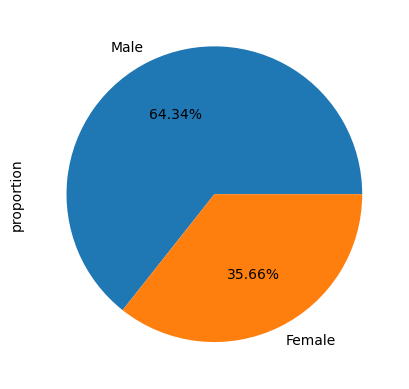

In [163]:
# Lab Class Method
df['sex'].value_counts(normalize=True).plot(kind='pie', autopct = '%.2f%%')
plt.show()

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


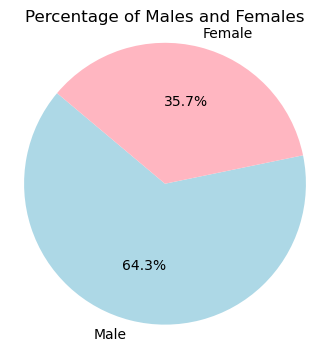

In [164]:
# Calculate the percentage of males and females in the dataset
gender_counts = df['sex'].value_counts(normalize=True) * 100

# Display the result
print(gender_counts)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Percentage of Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [165]:
#Lab Class Method
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

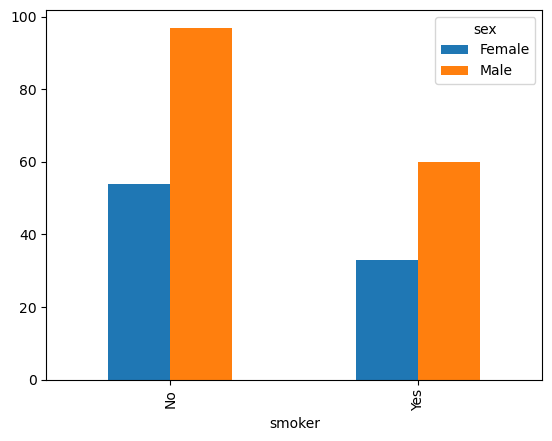

In [166]:
#Lab Class Method
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

smoker  No  Yes
sex            
Female  54   33
Male    97   60


<Axes: xlabel='sex'>

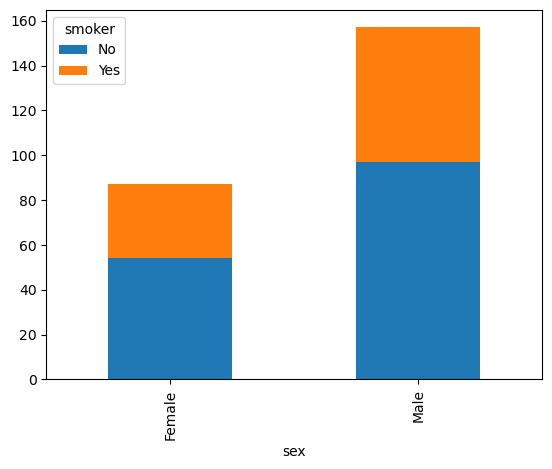

In [167]:
# Compute the gender-wise count based on smoking habits
gender_smoker_counts = df.groupby(['sex', 'smoker']).size().unstack()

# Display the result
print(gender_smoker_counts)

# Plot a simple stacked bar chart with default settings
df.groupby(['sex', 'smoker']).size().unstack().plot(kind='bar', stacked=True)

# Display stacked bar -- different type of coding
#df.groupby(['sex', 'smoker']).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 3), color=['lightblue', 'lightcoral'], 
#title='Gender-wise Count Based on Smoking Habits', xlabel='Gender', ylabel='Count', rot=0).legend(title='Smoker')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [168]:
# Lab Class Method
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

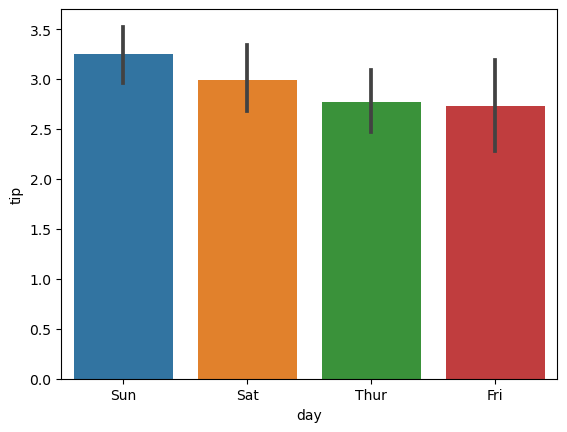

In [169]:
# Lab Class Method
sns.barplot(x='day', y='tip', data = df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

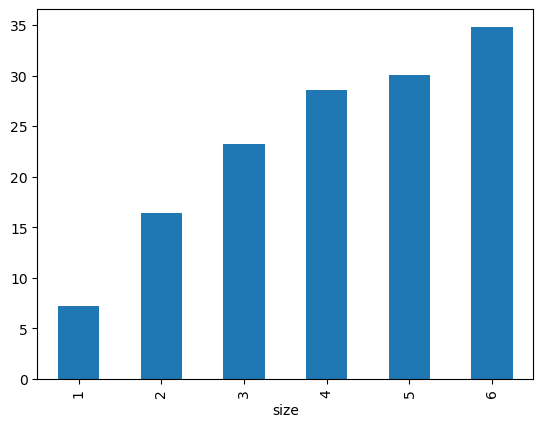

In [170]:
# Lab Class Method
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

Findings:
Positive Relationship: The plot shows a clear positive relationship between the size of the group and the average bill amount. 
As the group size increases, the average bill amount also increases.

Increasing Trend: The average bill starts at around $7.24 for a group size of 1 and rises to about $34.83 for a group size of 6. 
This indicates that larger groups tend to spend more overall, which is expected as more people likely order more food.

Rate of Increase: The increase in the average bill is relatively steady across different group sizes, suggesting that each additional
person in the group contributes a consistent amount to the total bill.

Potential Influences: The trend might reflect that larger groups order more items or more expensive items, contributing to higher total bills.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

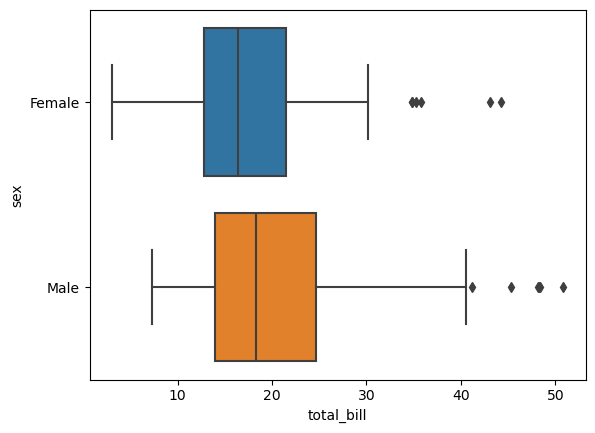

In [171]:
#Lab Class Method
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

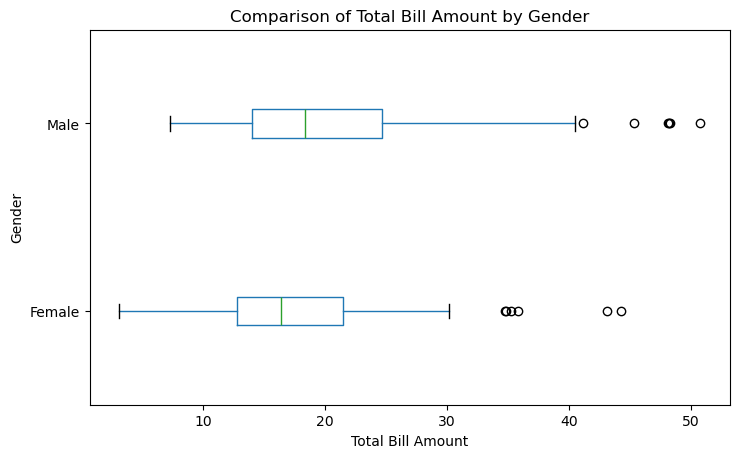

In [172]:
# Plot a horizontal boxplot to compare the bill amount based on gender
df.boxplot(column='total_bill', by='sex', vert=False, figsize=(8, 5), grid=False)

plt.title('Comparison of Total Bill Amount by Gender')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [173]:
#Lab Class Method
df.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [174]:
#Lab Class Method
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [175]:
# Lab Class Method
len(df[df.duplicated()])

1

In [176]:
# Lab Class Method
df.drop_duplicates(inplace=True)

In [177]:
# Lab Class Method
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

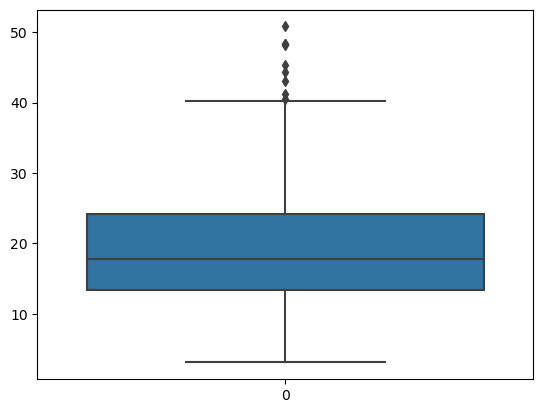

In [178]:
# Lab Class Method
sns.boxplot(df['total_bill'])
plt.show()

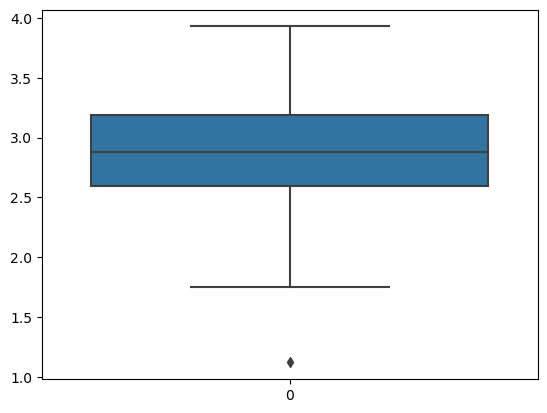

In [179]:
# Lab Class Method
df['total_bill_trans'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

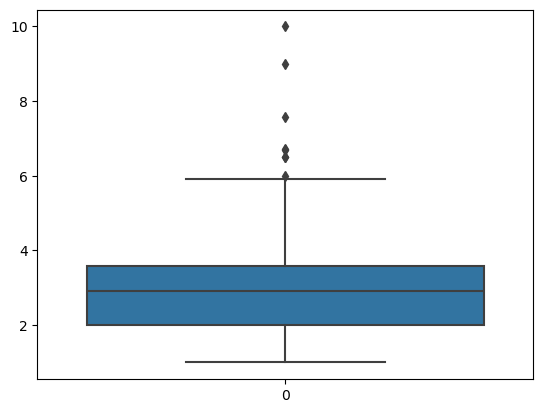

In [180]:
# Lab Class Method
sns.boxplot(df['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [181]:
# Lab Class Method
df = pd.get_dummies(df, drop_first = True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
234,15.53,3.00,2,2.742774,True,True,True,False,False,False
86,13.03,2.00,2,2.567254,True,False,False,False,True,True
56,38.01,3.00,4,3.637849,True,True,True,False,False,False
131,20.27,2.83,2,3.009142,False,False,False,False,True,True
153,24.55,2.00,4,3.200712,True,False,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [182]:
# Lab Class Method
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max - tb_min
print(range_)

47.74


In [183]:
## initialize minmaxscalar
mm = MinMaxScaler()

In [184]:
## Normalizing the values of the total_bill, so that the range will be 1.
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [185]:
## checking the range after normalization
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [186]:
# Lab Class Method
## Loading the dataset again as 'tips_df'
tips_df = pd.read_csv('06W_tips.csv')
tips_df.head(2) 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [187]:
## Encoding categorical variables
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [188]:
## Storing the target column in Y variable and the rest of the columns in the X variable.
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [189]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [190]:
## Fitting a linear regression model on the train data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [191]:
## Making predictions on the test data
pred = lr.predict(X_test)

In [192]:
## Computing r2_score
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.48704258144913215


### Happy Learning:)